<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/13-statistics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path_empl = '../tables_/employees.parquet' if os.path.exists('../tables_/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl).query('report_dt >= "2022-10-31"')[
    ['report_dt', 'fio', 'sex', 'birth_date', 'mgmt_flag', 'employee_evaluation', 'salary']]
empl.head()

,report_dt,fio,sex,birth_date,mgmt_flag,employee_evaluation,salary
27931,2022-10-31,Васильева Дарья Тимуровна,женский,1994-02-16,1,4,76600.0
27932,2022-10-31,Балашов Петр Максимович,мужской,1980-09-16,0,7,42700.0
27933,2022-10-31,Филимонов Дмитрий Васильевич,мужской,1974-12-12,0,4,20900.0
27934,2022-10-31,Демьянова Юлия Ярославовна,женский,1980-08-15,0,5,21200.0
27935,2022-10-31,Головина Кристина Захаровна,женский,1974-04-30,0,8,29000.0


## Построение гистограмм

Как правило, у гистограммы по оси х расположен какой-то непрерывный показатель (например зарплаата или возраст), разделенный на интервалы. Высота стоблца означает, какое количесво наблюдений попало в каждый инервал.

<Axes: >

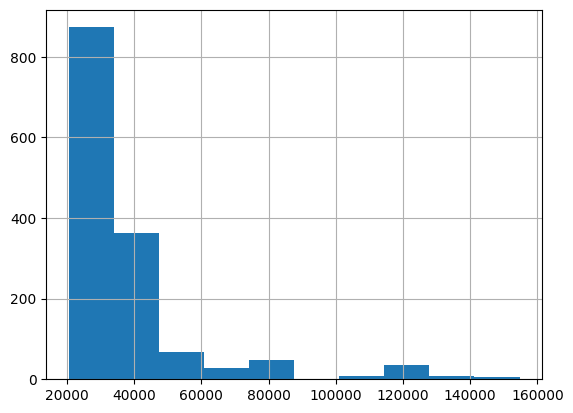

In [3]:
empl['salary'].hist()
# Можно еще написать
# plt.hist(empl['salary'])
# [ 20500.,  33920.,  47340.,  60760.,  74180.,  87600., 101020., 114440., 127860., 141280., 154700.]

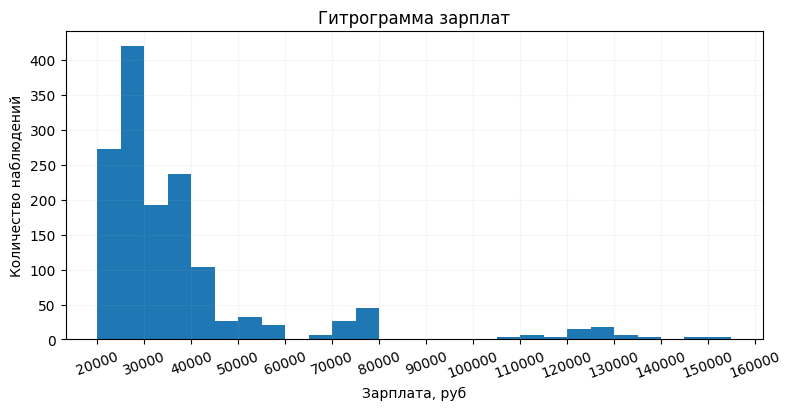

In [4]:
plt.figure(figsize=(9, 4)) # определяем размеры графика, первое значение - ширина, второе высота

plt.hist(empl['salary'], # данные
         range=(20000, 155000), # range - интервал, на котором строится гистограмма
         bins=27 # bins=количество столбцов, на которые делется интервал 
        )

plt.title('Гитрограмма зарплат') # добавляем название графика
plt.xlabel('Зарплата, руб') # добавляем название оси х
plt.ylabel('Количество наблюдений') # добавляем название оси у
plt.xticks([i for i in range(20000, 160001, 10000)], rotation=20)
plt.grid(alpha=0.1) # добавляем сетку, устанвливая уровень прозрачности
plt.show() # выводим график на экран

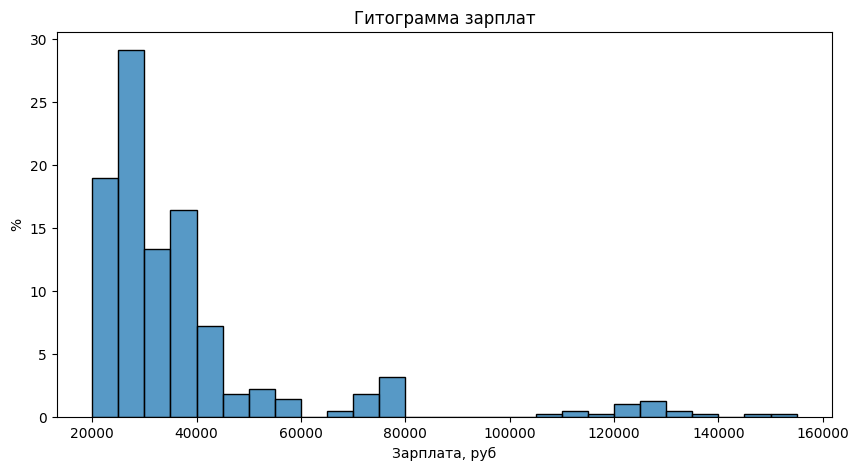

In [5]:
plt.figure(figsize=(10, 5))

(sns.histplot(data=empl, # датафрейм откуда берутся данные
              x='salary', # название колонки по которой строится график
              binwidth=5000, # ширина стобца
              binrange=(20000, 155000), # интервал, на котором строится гистограмма
              stat='percent' # статистика, которая будет считаться по оси y
             )
    .set(title='Гитограмма зарплат', xlabel='Зарплата, руб', ylabel='%')
)
plt.show() # выводим график на экран

#### Ядерная оценка плотности

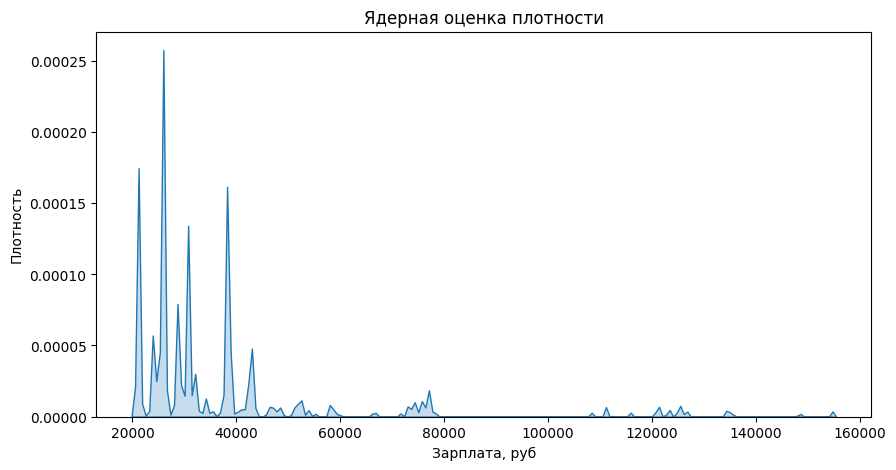

In [8]:
plt.figure(figsize=(10, 5))
(sns.kdeplot(data=empl, # датафрейм
             x='salary', # колонка, по которой строится график
             common_norm=True, # площадь под графиком равна 1
             fill=True, # тень под графиком
             bw_method=0.01 # окно пропускания
            )
    .set(title='Ядерная оценка плотности', xlabel='Зарплата, руб', ylabel='Плотность')
)
plt.show()

## Статистики

Статистика - это функция от выборки (то есть от данных)

Это может быть среднее значение, сумма всех элементов элементов выборки, первое значение, число уникальных значений или просто сама выборка

### Сумма

In [9]:
empl['salary'].sum()

54074500.0

### Произведение

In [10]:
empl['salary'].head().prod()

4.20278128424e+22

### Количество заполненных строк

In [11]:
empl['salary'].count()

1441

## Характеристики среднего

### Среднее арифметическое

$$
Среднее\ арифметическое = {сумма \over количество\ непустых\ строк}
$$

In [12]:
empl['salary'].mean()
# empl['salary'].sum() / empl['salary'].count()

37525.67661346287

Возвращаемое число не обычный float, а нампаевский

In [13]:
type(empl['salary'].mean())

numpy.float64

Поэтому с ним можно продолжать рабоать, например округлить

In [14]:
empl['salary'].mean().round()

37526.0

Центрирование данных (это вычитание из них среднего значения)

In [15]:
empl['salary'] - empl['salary'].mean()

27931    39074.323387
27932     5174.323387
27933   -16625.676613
27934   -16325.676613
27935    -8525.676613
             ...     
29367      474.323387
29368    -5725.676613
29369    -9125.676613
29370    -2025.676613
29371   -11125.676613
Name: salary, Length: 1441, dtype: float64

### Медиана

Медиана - это значение, которое находится посередине в отсортированном массиве

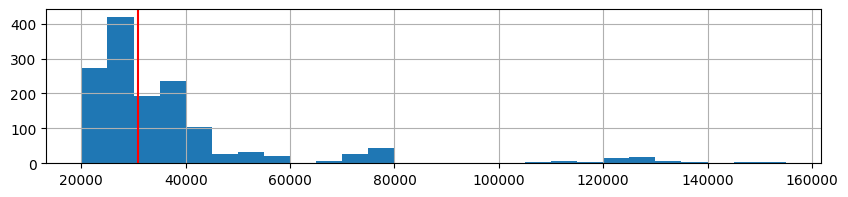

In [16]:
# рисуем гистограмму
empl['salary'].hist(figsize=(10, 2), bins=27, range=(20000, 155000))
# рисуем вертикальную красную линию
plt.axline(xy1=(empl.query('report_dt == "2022-12-31"')['salary'].median(), 0),
           xy2=(empl.query('report_dt == "2022-12-31"')['salary'].median(), 100), color='r')
plt.show()

In [17]:
empl['salary'].median()

30600.0

### Мода

Мода - это самое частое значение

In [18]:
empl['salary'].mode()

0    38000.0
Name: salary, dtype: float64

In [19]:
empl.query('salary == salary.mode().item()')['salary'].count()

106

In [20]:
empl['salary'].mode().item()
# empl['salary'].mode().iloc[0]

38000.0

In [21]:
pd.Series([1, 2, 3, 1, 3]).mode()

0    1
1    3
dtype: int64

## Характеристики разброса

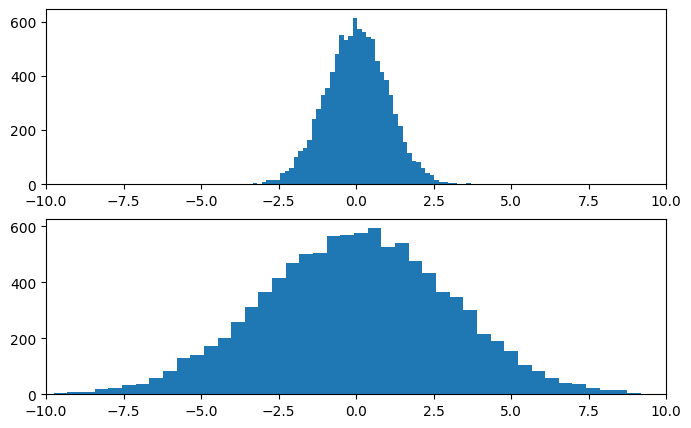

In [22]:
plt.figure(figsize=(8, 5))
np.random.seed(10)
plt.subplot(2, 1, 1)
plt.hist(np.random.normal(0, 1, 10000), bins=50)
plt.xlim((-10, 10))
plt.subplot(2, 1, 2)
plt.hist(np.random.normal(0, 3, 10000), bins=50)
plt.xlim((-10, 10))
plt.show()

### Дисперсия

Дисперсия - это средний квадрат отклонения от среднего

In [23]:
empl['salary'].var()

505531465.25368184

Попробуем посчитать ее руками

In [24]:
((empl['salary'] - empl['salary'].mean()) ** 2).mean()

505180645.36107

Как ее считает pandas

In [25]:
# Усредняем полученные числа
((empl['salary'] - empl['salary'].mean()) ** 2).sum() / (empl['salary'].count() - 1)

505531465.25368184

In [26]:
# Дисперсии равны
empl['salary'].var()

505531465.25368184

Можно не вычитать единицу из знаменателя, а просто усреднить

In [27]:
((empl['salary'] - empl['salary'].mean()) ** 2).mean()

505180645.36107

In [28]:
empl['salary'].to_numpy().var()

505180645.36107

In [29]:
empl['salary'].var(ddof=0)

505180645.36107

### Стандартное отклонение 

Стандартное отклонение (среднеквадратичное отклонение) - это квадратный корень из дисперсии

In [30]:
empl['salary'].std()

22484.02689141075

In [31]:
empl['salary'].var() ** 0.5

22484.02689141075

### Минимум максимум

In [32]:
empl['salary'].min()

20500.0

In [33]:
empl['salary'].max()

154700.0

### Квантили

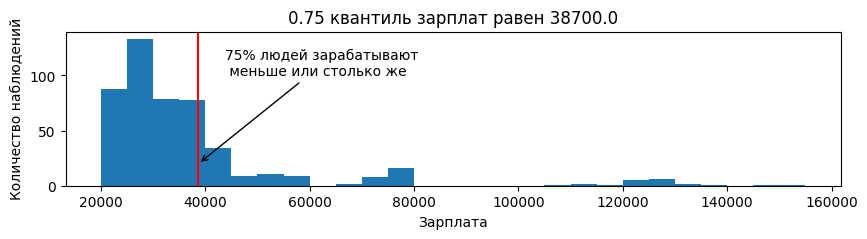

In [35]:
quantile = 0.75
salary = empl.query('report_dt == "2022-12-31"')['salary']

salary.hist(figsize=(10, 2), bins=27, range=(20000, 155000))

plt.axline(xy1=(salary.quantile(quantile), 0), xy2=(salary.quantile(quantile), 100), color='r')

plt.annotate(f'{int(quantile * 100)}% людей зарабатывают \n меньше или столько же',
            (salary.quantile(quantile), 20), xytext=(salary.quantile(quantile) + 5000, 100),
             arrowprops={'arrowstyle': '->'})

plt.title(f'{quantile} квантиль зарплат равен {salary.quantile(quantile)}')
plt.grid(False)
plt.xlabel('Зарплата')
plt.ylabel('Количество наблюдений')
plt.show()

In [36]:
empl.query('report_dt == "2022-12-31"')['salary'].quantile(0.2)

25600.0

Если квантиль в точности не определен, тогда он будет интерполирован

In [37]:
# в массииве только целые числа, но метод вернул дробное число
empl['salary'].quantile(0.0001)

20528.8

Это же касается и медианы

In [38]:
pd.Series([1, 2, 3, 4]).median()

2.5

In [39]:
pd.Series([1, 2, 3, 4]).quantile(0.5)

2.5

In [40]:
pd.Series([1, 2, 3, 4]).quantile(0.5, interpolation='higher')

3

### При помощи метода rank можно получить квантиль каждого наблюдения

In [41]:
empl['salary'].rank(pct=True).head()

27931    0.939972
27932    0.817488
27933    0.021166
27934    0.079459
27935    0.464955
Name: salary, dtype: float64

#### В numpy функции и методы называются так же как и в пандасе кроме квантилей

In [42]:
np.mean(np.arange(100))

49.5

In [43]:
np.arange(100).mean()

49.5

Персентиль в сто раз больше квантиля

In [44]:
np.percentile(np.arange(1001), 57)

570.0

In [45]:
pd.Series(np.arange(1001)).quantile(0.57)

570.0

### Все эти методы есть и у датафреймов

In [46]:
path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks = pd.read_excel(path_marks)
marks.head()

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3


In [47]:
# Считаем среднее только по колонкам, в которых лежат числа
marks.mean(numeric_only=True)

Математика             4.000000
Русский язык           4.052632
Литература             3.947368
Физика                 3.947368
История                3.894737
Физическая культура    4.684211
dtype: float64

In [48]:
# Если все колонки уже численные, то параметр numeric_only можно не использовать
marks[['Математика', 'Литература']].mean()

Математика    4.000000
Литература    3.947368
dtype: float64

### Можно указывать ось, по которой считать статистику

In [52]:
(marks
    .set_index(['ФИО', 'Пол']) # убираем нечисленные колонки
    .mean(axis=1)
    .to_frame()
)

,,0
ФИО,Пол,
Суханова Маргарита Богдановна,женский,3.333333
Лаврентьев Давид Анатольевич,мужской,3.333333
Винниченко Дарья Максимовна,женский,4.333333
Козлова Маргарита Максимовна,женский,4.833333
Кулешов Евгений Маратович,мужской,3.333333
Исаева Елизаваета Петровна,женский,3.666667
Артамонова Арина Семеновна,женский,4.000000
Михайлова Ксения Родионовна,женский,4.000000
Бирюкова Арина Александровна,женский,3.666667


### Расчет статистики по всему датафрейму целиком

In [53]:
# Работает с версии 2.0.0. и выше
(marks
    .set_index(['ФИО', 'Пол']) # убираем нечисленные колонки
    .mean(axis=None)
)

C:\Users\Александр\AppData\Local\Temp\ipykernel_8804\438758774.py:4: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  .mean(axis=None)


Математика             4.000000
Русский язык           4.052632
Литература             3.947368
Физика                 3.947368
История                3.894737
Физическая культура    4.684211
dtype: float64

In [54]:
(marks
    .set_index(['ФИО', 'Пол'])
    .to_numpy()
    .mean()
)

4.087719298245614

### Еще визуализация распределений

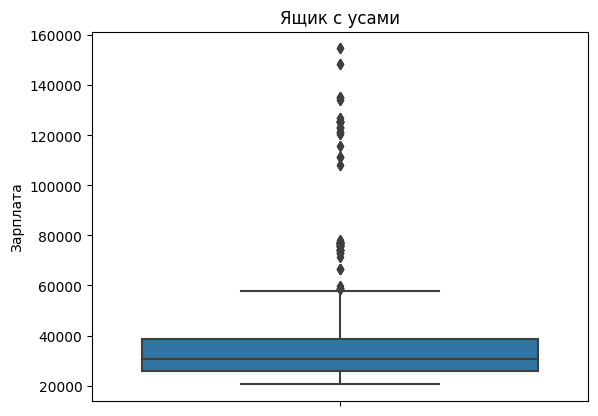

In [55]:
sns.boxplot(data=empl, y='salary').set(title='Ящик с усами', ylabel='Зарплата')
plt.show()

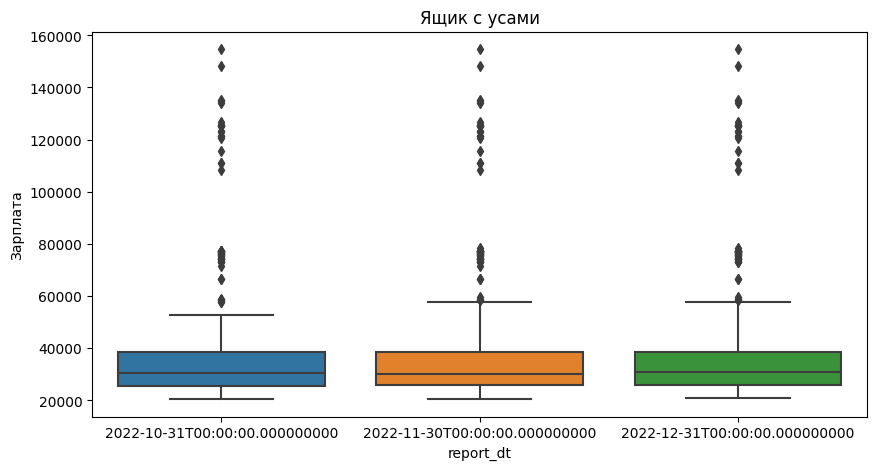

In [56]:
# Добавляем деление по оси х
plt.figure(figsize=(10, 5))
sns.boxplot(data=empl, y='salary', x='report_dt').set(title='Ящик с усами', ylabel='Зарплата')
plt.show()

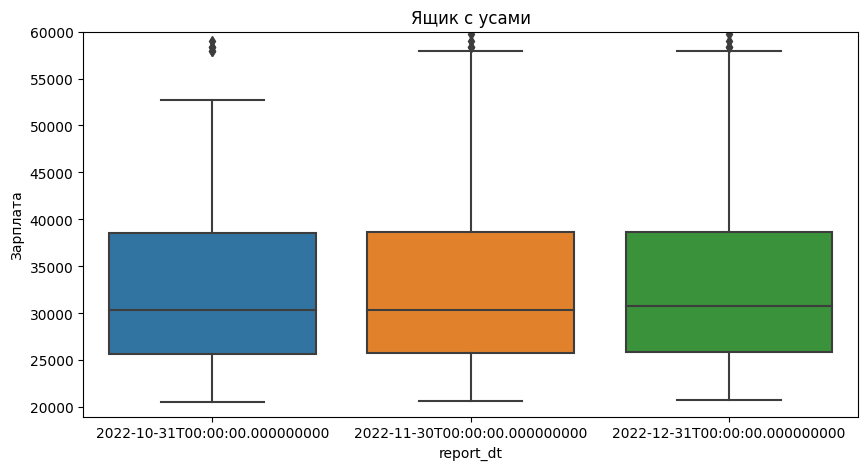

In [57]:
plt.figure(figsize=(10, 5))
(sns.boxplot(data=empl, y='salary', x='report_dt')
    .set(title='Ящик с усами', ylabel='Зарплата')
)
# обрезаем выбросы
plt.ylim((19000, 60000))
plt.show()

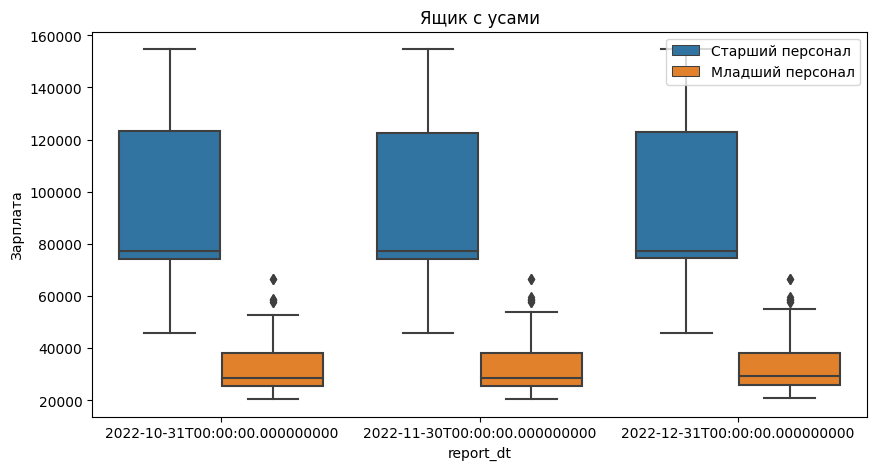

In [58]:
# Добавляем hue
plt.figure(figsize=(10, 5))
(sns.boxplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Ящик с усами', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

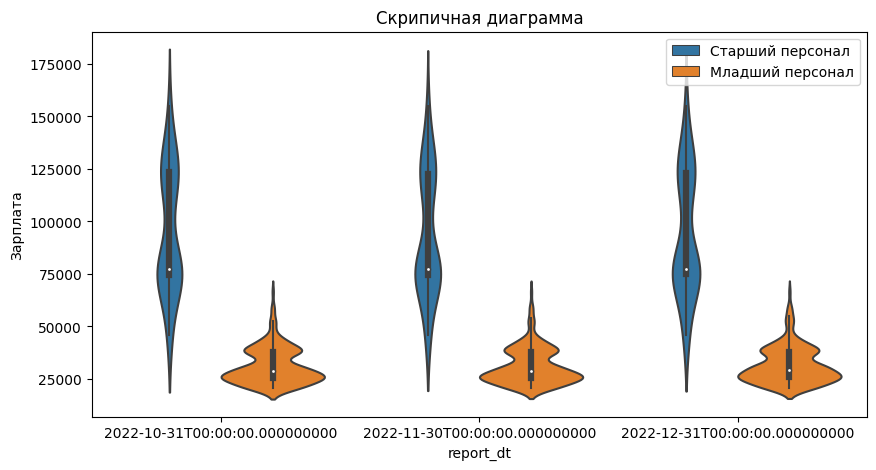

In [59]:
plt.figure(figsize=(10, 5))
(sns.violinplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Скрипичная диаграмма', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

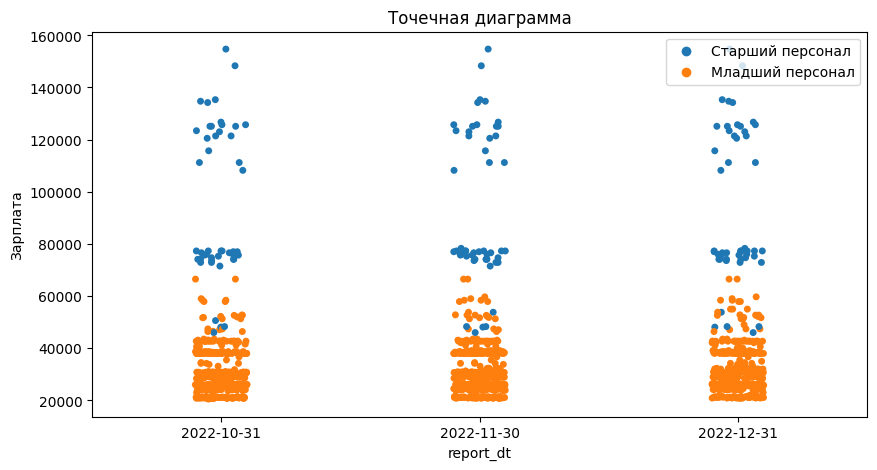

In [60]:
plt.figure(figsize=(10, 5))
(sns.stripplot(data=empl
                 .replace({'mgmt_flag': {0: 'Младший персонал', 1: 'Старший персонал'}}),
             y='salary', x='report_dt', hue='mgmt_flag')
 
    .set(title='Точечная диаграмма', ylabel='Зарплата')
)
plt.legend(loc='upper right')
plt.show()

### Корреляция

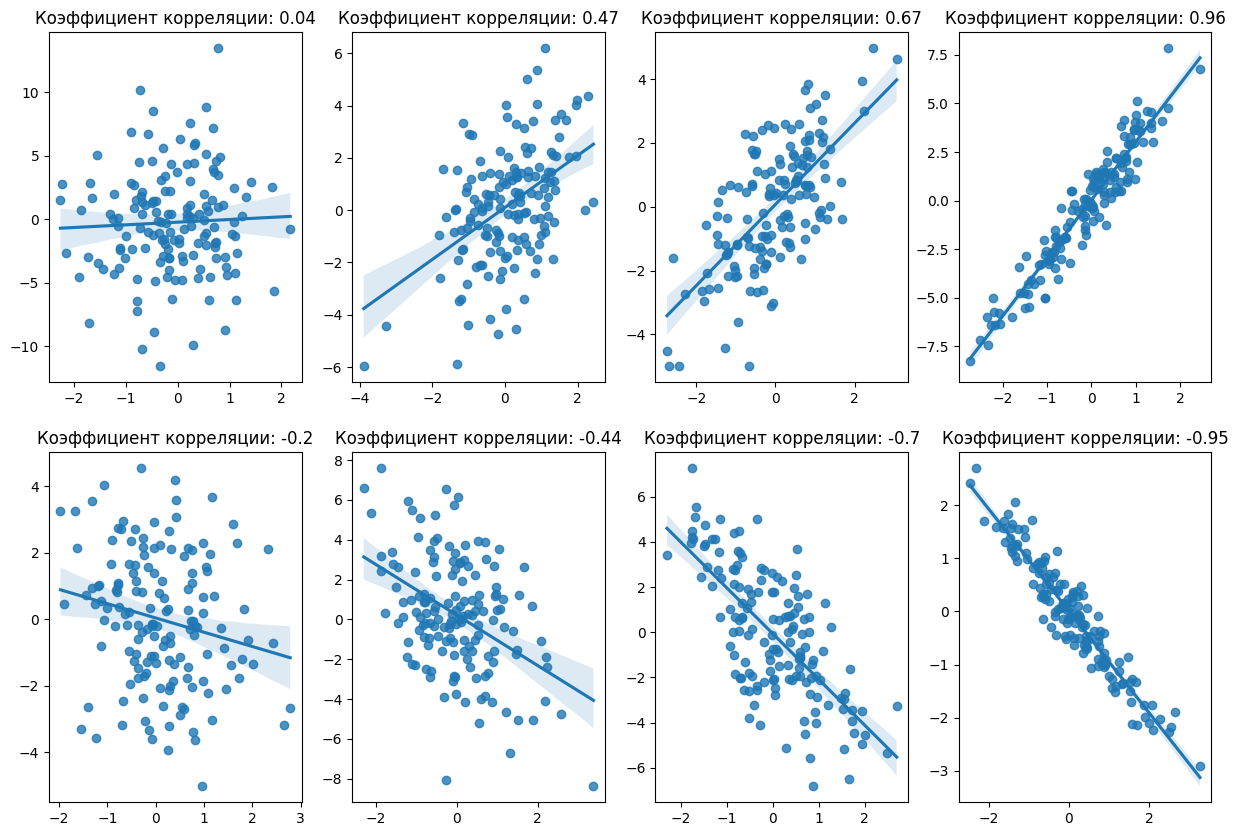

In [61]:
plt.figure(figsize=(15, 10))
for i, cor in enumerate([0.1, 0.4, 0.7, 0.95, -0.1, -0.4, -0.7, -0.95]):
    # Генерируем данные
    np.random.seed(i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, cor], [cor, 1]], 150).T
    y = y * np.random.randint(1, 5)
    # Говорим на какое место поставить график (2 стобца, 4 колонки, номер позиции)
    plt.subplot(2, 4, i + 1)
    # рисуем грайик
    sns.regplot(x=x, y=y)
    # подписываем график
    plt.title(f'Коэффициент корреляции: {np.round(np.corrcoef(x, y)[0][1], 2)}')
plt.show()

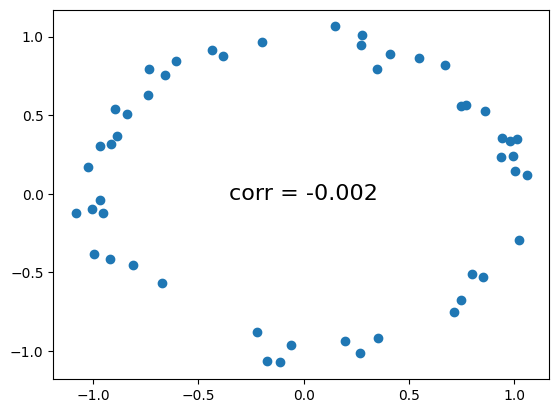

In [62]:
np.random.seed(500)
t = np.random.rand(50) * 10
cos = np.cos(t) + np.random.normal(0, 0.05, 50)
sin = np.sin(t) + np.random.normal(0, 0.05, 50)
# рисуем график
plt.scatter(cos, sin)
# подписываем 
plt.text(y=0, x=0, s=f'corr = {np.corrcoef(cos, sin)[0, 1]:0.3f}', fontsize=16, ha='center', va='center')
plt.show()

#### Расчет коэффицииента корреляции

In [63]:
marks['Математика'].corr(marks['Литература'])

0.31715648392255463

То же самое можно сделать руками

In [64]:
math_mean = marks['Математика'].mean()
math_std = marks['Математика'].std(ddof=0)

lit_mean = marks['Литература'].mean()
lit_std = marks['Литература'].std(ddof=0)

math_normilized = (marks['Математика'] - math_mean) / math_std
lit_normilized = (marks['Литература'] - lit_mean) / lit_std


(math_normilized * lit_normilized).mean()

0.31715648392255463

###  Корреляционная матрица

In [65]:
marks.corr(numeric_only=True)

,Математика,Русский язык,Литература,Физика,История,Физическая культура
Математика,1.000000,0.528594,0.317156,0.477876,0.202139,0.444300
Русский язык,0.528594,1.000000,0.676471,0.207400,0.652345,0.506791
Литература,0.317156,0.676471,1.000000,0.095723,0.629850,0.197772
Физика,0.477876,0.207400,0.095723,1.000000,0.183027,-0.033524
История,0.202139,0.652345,0.629850,0.183027,1.000000,0.265886
Физическая культура,0.444300,0.506791,0.197772,-0.033524,0.265886,1.000000


<Axes: >

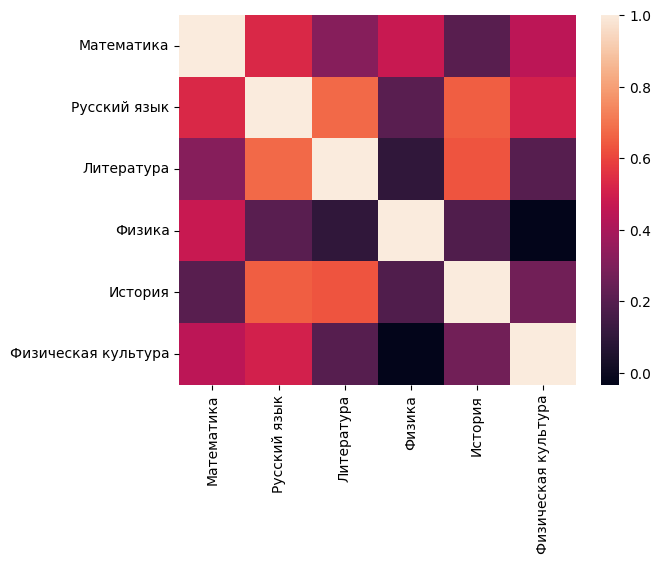

In [66]:
sns.heatmap(marks.corr(numeric_only=True))

<Axes: >

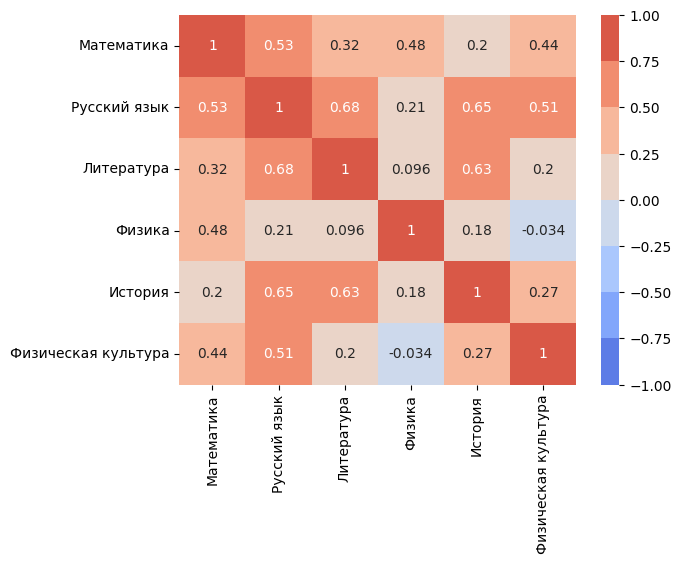

In [69]:
sns.heatmap(marks.corr(numeric_only=True),
            annot=True, # Добавляем численные значения в клетки
            # цветовая схема, разделенная на 8 цветов
            cmap=sns.color_palette("coolwarm", n_colors=8),
            vmin=-1, # минимальное значение в легенде
            vmax=1) # максимальное значение в легенде

Можно разукрасить сам датафрейм

In [70]:
(marks
    .corr(numeric_only=True)
    .style
    .background_gradient(cmap=sns.color_palette("coolwarm", as_cmap=True),
                         axis=None,
                         vmin=-1,
                         vmax=1)
)

,Математика,Русский язык,Литература,Физика,История,Физическая культура
Математика,1.000000,0.528594,0.317156,0.477876,0.202139,0.444300
Русский язык,0.528594,1.000000,0.676471,0.207400,0.652345,0.506791
Литература,0.317156,0.676471,1.000000,0.095723,0.629850,0.197772
Физика,0.477876,0.207400,0.095723,1.000000,0.183027,-0.033524
История,0.202139,0.652345,0.629850,0.183027,1.000000,0.265886
Физическая культура,0.444300,0.506791,0.197772,-0.033524,0.265886,1.000000


## Агрегация нескольких статистик вместе

### describe

In [71]:
empl['salary'].describe()

count      1441.000000
mean      37525.676613
std       22484.026891
min       20500.000000
25%       25800.000000
50%       30600.000000
75%       38700.000000
max      154700.000000
Name: salary, dtype: float64

In [72]:
empl.describe()

,mgmt_flag,employee_evaluation,salary
count,1441.000000,1385.0,1441.000000
mean,0.100625,5.574729,37525.676613
std,0.300935,1.169369,22484.026891
min,0.000000,3.0,20500.000000
25%,0.000000,5.0,25800.000000
50%,0.000000,6.0,30600.000000
75%,0.000000,6.0,38700.000000
max,1.000000,10.0,154700.000000


Можно добавить дополнительные квантили

In [73]:
empl.describe([0.1, 0.25, 0.75, 0.9])

,mgmt_flag,employee_evaluation,salary
count,1441.000000,1385.0,1441.000000
mean,0.100625,5.574729,37525.676613
std,0.300935,1.169369,22484.026891
min,0.000000,3.0,20500.000000
10%,0.000000,4.0,21300.000000
25%,0.000000,5.0,25800.000000
50%,0.000000,6.0,30600.000000
75%,0.000000,6.0,38700.000000
90%,1.000000,7.0,58400.000000
max,1.000000,10.0,154700.000000


### agg

Позволяет собирать несколько статистик вместе

In [74]:
# список из названий методов
empl['salary'].agg(['mean', 'max', 'std'])

mean     37525.676613
max     154700.000000
std      22484.026891
Name: salary, dtype: float64

In [75]:
# их можно комбинировать с функциями из numpy
empl['salary'].agg([np.mean, np.max, 'std'])

mean     37525.676613
amax    154700.000000
std      22484.026891
Name: salary, dtype: float64

In [77]:
# Можно использовать свои функции
(empl['salary']
    .agg(
        ['mean',
         lambda s: (s ** (1 / s.count())).prod(),
         lambda s: 1 / ((1 / s).mean())
        ])
    .set_axis(['Среднее арифметическое', 'Среднее геометрическое', 'Среднее гармоническое'])
)

Среднее арифметическое    37525.676613
Среднее геометрическое    33655.975017
Среднее гармоническое     31303.995178
Name: salary, dtype: float64

#### Можно передать словарь. Сначала как метод будет называться, а затем функция

In [78]:
(empl['salary']
    .agg({'Среднее арифметическое': 'mean',
          'Среднее геометрическое': lambda s: (s ** (1 / s.count())).prod(),
          'Среднее гармоническое': lambda s: 1 / ((1 / s).mean())
         })
)

Среднее арифметическое    37525.676613
Среднее геометрическое    33655.975017
Среднее гармоническое     31303.995178
Name: salary, dtype: float64

### То же самое можно делать с датафреймами

In [79]:
marks.head()

,ФИО,Пол,Математика,Русский язык,Литература,Физика,История,Физическая культура
0,Суханова Маргарита Богдановна,женский,3,3,3,3,3,5
1,Лаврентьев Давид Анатольевич,мужской,3,3,3,5,3,3
2,Винниченко Дарья Максимовна,женский,4,5,5,3,4,5
3,Козлова Маргарита Максимовна,женский,5,5,5,5,4,5
4,Кулешов Евгений Маратович,мужской,3,3,4,3,4,3


In [80]:
# передаем список из функци
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(['mean', 'max', 'min'])
)

,Математика,Русский язык,Литература,Физика,История,Физическая культура
mean,4.0,4.052632,3.947368,3.947368,3.894737,4.684211
max,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
min,3.0,3.000000,3.000000,3.000000,3.000000,3.000000


In [81]:
# можно передать словарь со списком функций агрегации
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg({'Математика': ['mean', 'max'],
         'Русский язык': 'std',
         'Литература': ['mean', 'median']})
)

,Математика,Русский язык,Литература
mean,4.0,NaN,3.947368
max,5.0,NaN,NaN
std,NaN,0.705036,NaN
median,NaN,NaN,4.000000


In [82]:
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(avarage = ('Математика', 'mean'),
         summa = ('Математика', 'sum'),
         sqrt_err = ('История', 'std')
#          summa = ('История', 'sum'), # это работать не будет 
        )
)

,Математика,История
avarage,4.0,NaN
summa,76.0,NaN
sqrt_err,NaN,0.737468


## На вход функии в метод agg приходит объект Series

In [83]:
(marks
    .drop(['ФИО', 'Пол'], axis=1)
    .agg(
        ['mean',
         lambda s: s[s >= 4].mean() # фильтровать значения получится только внутри колонки и только по ней самой
        ])
    .set_axis(['Среднее', 'Среднее среди тех, у кого 4 или 5'])
)

,Математика,Русский язык,Литература,Физика,История,Физическая культура
Среднее,4.000000,4.052632,3.947368,3.947368,3.894737,4.684211
"Среднее среди тех, у кого 4 или 5",4.357143,4.333333,4.285714,4.384615,4.307692,4.882353


#### В метод agg нельзя передавать квантили

In [84]:
empl['salary'].agg([np.mean, np.max, 'std', lambda x: x.quantile(0.8)])

mean         37525.676613
amax        154700.000000
std          22484.026891
<lambda>     42700.000000
Name: salary, dtype: float64

In [85]:
class Quantile:
    def __init__(self, q: float):
        self.q = q
        self.__name__ = f'{q} квантиль'
    
    def __call__(self, series: pd.Series):
        return series.quantile(self.q)

In [86]:
empl['salary'].agg([np.mean, np.max, 'std', Quantile(0.8)])

mean             37525.676613
amax            154700.000000
std              22484.026891
0.8 квантиль     42700.000000
Name: salary, dtype: float64

#### Иногда после агрегации необходимо выполнять дополнительные действия

In [87]:
path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
sales = pd.read_parquet(path_sales_2022).iloc[:, -2:]
sales.head()

,price,goods_number
0,1199.9,1
1,2299.9,1
2,4720.0,1
3,5899.9,1
4,8999.9,1


Найдем среднюю строимость проданных товаров

In [95]:
(sales
    .assign(price_mul_number = lambda x: x['price'] * x['goods_number'])
    [['goods_number', 'price_mul_number']]
    .sum()
    .to_frame()
    .T
    .assign(mean_goods_price_sold=lambda x: x['price_mul_number'] / x['goods_number'])
    .drop(['goods_number', 'price_mul_number'], axis=1)
     .iloc[0, 0]
)

3544.3268431643496

### Статистические функции в сочетании с другими методами

#### Проверяем процент заполенных значений

In [97]:
(empl
    .notnull()
    .mean()
)

report_dt              1.000000
fio                    1.000000
sex                    1.000000
birth_date             1.000000
mgmt_flag              1.000000
employee_evaluation    0.961138
salary                 1.000000
dtype: float64

#### Или наоборот считаем количество пропущенных значений

In [98]:
empl['employee_evaluation'].isna().sum()

56

#### Доля людей, зарабатывающих больше 50 000

In [99]:
empl['salary'].ge(50000).mean()
# То же самое, что и
# (empl['salary'] >= 50000).mean()

0.1311589174184594

#### Число записей по зарплате, втречающихся только 1 раз

In [100]:
(~empl['salary'].duplicated(keep=False)).sum()

7

#### Доля женщин в магазине

In [101]:
empl['sex'].eq('женский').mean()
# Это то же самое, что и
# (empl['sex'] == 'женский').mean()

0.6412213740458015

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1
Для таблицы stocks воспользуйтесь методом describe

In [ ]:
import os
import pandas as pd

path_stocks = '../tables/stocks.parquet' if os.path.exists('../tables/stocks.parquet') else 'https://drive.google.com/uc?id=1weGquTtmR92mKYAeZhZCFHJjndyoSXZt'

stocks = pd.read_parquet(path_stocks)
stocks.head()

In [ ]:
# Напишите свой код здесь

### Задание 2

Посчитайте долю выходных дней в 2020 году

In [ ]:
import os
import pandas as pd

path_w_ends = '../tables/выходные.csv' if os.path.exists('../tables/выходные.csv') else 'https://drive.google.com/uc?id=1hAsoXSPTFihFmBuF-E0uSj9pX4gpojwC'

w_ends = pd.read_csv(path_w_ends)
w_ends.head()

In [ ]:
# Напишите свой код здесь

### Задание 3

Для колонки зарплата посчитайте среднее значение, медиану, 0.25 квантиль, 0.9 квантиль, станадартное отклонение за 2022 год

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 4

Посчитать какой процент женщин в руководстве (поле mgmt)

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 5

Посчитать какой процент сотрудников - мужчины

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 6

Посчитайте среднюю оценку по математике среди мальчиков

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 7

Посчитайте коэффициент корреляции между ценой товара и ценой товара по скидке

In [ ]:
import os
import pandas as pd

path_prices = '../tables/prices.parquet' if os.path.exists('../tables/prices.parquet') else 'https://drive.google.com/uc?id=1_KfYyYCsib8woanbP3VouLUpYp103dV5'

prices = pd.read_parquet(path_prices)
prices.head()

In [ ]:
# Напишите свой код здесь

### Задание 8

Найдите детей, у которых либо все тройки, либо все четверки, либо все пятерки

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 9

Посчитайте сумарную выручку и среднюю стоимость проданного товара в магазине 5

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# Напишите свой код здесь

### Задание 10

Отберите детей, у которых была всего одна тройка

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 11

Согласно неравенству Маркова, для неотрицательного показателя доля наблюдейний, превышающих некоторое число а меньше или равна среднему значению этого показателя, деленному на это число а.

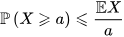

P - доля наблюдений, для которых выполняется условие, записанное в скобках

E X - среднее значение показателя X


Проверьте неравенство на данных по зарплате сотрудников по состоянию на 31 декабря 2022 года. Посчитайте долю сотрудников, зарабатывающих больше 90 000 и сравните это значение со средней зарплатой деленной на 90 000. Выполняется ли оно?

In [ ]:
import os
import pandas as pd

path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

In [ ]:
# Напишите свой код здесь

### Задание 12

Посчитайте среднюю оценку по математике среди мальчиков

Сделайте 100 выборок с возвращением в которых посчитайте 80 квантиль в зарплате мужчин за 31 декабря 2022 года. Усредните полученные значения

Затем сделайте то же самое, только для женщин. Сравните результаты

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

### Задание 13

Перемножьте колонки price и goods_number и добавьте получившееся значение как отдельрную колнку. После этого для нее и для колонки price посчитайте 2 показателя: среднюю абсолютную ошибку относительно среднего и среднюю абсолютную ошибку относительно медианы. 

Для этого из каждого значения в колонке вычтите среднее (медиану) по колонке. Затем возьмите модуль от получившейся колонки. Затем усредните ее.

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# Напишите свой код здесь

## Задания на нампай

### Задание 14

В нампае в большинстве случаев названия стат функций называются точно так же как и в пандасе.

Посчитайте среднее, и стандартное отклонение по всей матрице и по отдельной строке (в отдельных ячейках)

In [ ]:
import numpy as np
np.random.seed(21)
m = np.random.rand(56).reshape(-1, 4)
m

In [ ]:
# Напишите свой код здесь

### Задание 15

В этом задании давайте посмотрим на то, что если две нормальные случайные величины некоррелированы, то они необязательно независимы.

Просимулируем 2 нормальные случайные величины, создав 100000 реализаций каждой.

In [ ]:
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(35)
x = np.random.normal(0, 1, size=100000)
y = x * np.random.choice([-1, 1], size=100000)

Проверим, что распрдееления действительно являются нормальными. Будем считать, что если pvalue больше 0.05, то распределение нормальное

In [ ]:
shapiro(x)

In [ ]:
shapiro(y)

Посчитайте коэффициент корреляции между x и y. Это можно сделать при помощи np.corrcoef. В эту функцию через запятую предайте x и y

In [ ]:
# Напишите свой код здесь

Как видите коэффициент корреляции очень близок к нулю (если считать теоретически, то он будет в точности равен нулю).

Теперь постройте scatter для переменных x и y при помощи функции plt.scatter(x, y). 
Можно ли сказать, что переменные независимы?

In [ ]:
# Напишите свой код здесь

При помощи теста Шапиро проверьте является ли нормальной случайной величина x + 2 * y.

Это кстати говорит о том, что сумма двух нормальных случайных величин необязательно распределена нормально. 

(Впрочем на самом деле это крайний случай)

In [ ]:
# Напишите свой код здесь

### Задание 16

Не используя функцию corr посчитайте коэффициент коррляции между оценками (задание для тех, кто знает как перемножать матрицы)

In [ ]:
import os
import pandas as pd

path_marks = '../tables/школьные оценки.xlsx' if os.path.exists('../tables/школьные оценки.xlsx') else 'https://drive.google.com/uc?id=1v9kRv1I03CXtQ6vFE4mE3hFAty436qAo'

marks = pd.read_excel(path_marks)
marks.head()

In [ ]:
# Напишите свой код здесь

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_11524\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
